# 3. MUESTREO INFERENCIA ESTADISTICA

# LIBS

In [12]:
# ==========================================
# Análisis completo de jugadores mundialistas
# Basado en confederación y condición de campeón
# ==========================================


from exps.loaders import Loaders
from exps.mundial_exps_extended import Experimentos
from exps.dists import AnalisisEstadistico
from exps.dists import Muestreos
import pandas as pd
import scipy.stats as stats
ld=Loaders()
exper=Experimentos()
muestreos= Muestreos()


# Cargar archivo Excel
path = './datain/Proyecto_mundial.xlsx'
df_mundial= ld.cargar_excel(path,'Sheet1')

# Inicializar clases
dist = AnalisisEstadistico(df_mundial)
exper = Experimentos()

n=2500

# MUESTREO ALEATORIO SIMPLE

In [13]:
df_simple= muestreos.muestreo_aleatorio_simple(df_mundial,n)

# MUESTREO ESTRATIFICADO

In [14]:
df_estratificado= muestreos.muestreo_estratificado(df_mundial,'FaseAlcanzada',n)


# MUESTREO PROPORCIONAL

In [15]:
df_proporcional= muestreos.muestreo_estratificado_proporcional(df_mundial,'confederacion',n)



# MUESTREO SISTEMATICO

In [16]:
df_sistematico=muestreos.muestreo_sistematico(df_mundial,n)


# ESTIMACIONES PUNTUALES GOLES MARCADOS

In [17]:
resultados = []
resultados.append(muestreos.resumen_estimaciones(df_mundial, df_simple, "Simple", 'Goles Marcados(mundial)', 'dummy_campeon'))
resultados.append(muestreos.resumen_estimaciones(df_mundial, df_estratificado, "Estratificado", 'Goles Marcados(mundial)', 'dummy_campeon'))
resultados.append(muestreos.resumen_estimaciones(df_mundial, df_proporcional, "Conglomerado", 'Goles Marcados(mundial)', 'dummy_campeon'))
resultados.append(muestreos.resumen_estimaciones(df_mundial, df_sistematico, "Sistemático", 'Goles Marcados(mundial)', 'dummy_campeon'))

import pandas as pd
df_resultados = pd.DataFrame(resultados)
df_resultados


,muestra,media_muestral,media_poblacional,proporcion_muestral,proporcion_poblacional,varianza_muestral,varianza_poblacional
0,Simple,0.222000,0.212134,0.043600,0.047547,0.641773,0.534388
1,Estratificado,0.212134,0.212134,0.047547,0.047547,0.534446,0.534388
2,Conglomerado,0.231293,0.212134,0.047619,0.047547,0.622223,0.534388
3,Sistemático,0.229600,0.212134,0.052800,0.047547,0.629936,0.534388


# ESTIMACIONES PUNTUALES EDAD

In [18]:
resultados = []
resultados.append(muestreos.resumen_estimaciones(df_mundial, df_simple, "Simple", 'edad_Player', 'dummy_campeon'))
resultados.append(muestreos.resumen_estimaciones(df_mundial, df_estratificado, "Estratificado", 'edad_Player', 'dummy_campeon'))
resultados.append(muestreos.resumen_estimaciones(df_mundial, df_proporcional, "Conglomerado", 'edad_Player', 'dummy_campeon'))
resultados.append(muestreos.resumen_estimaciones(df_mundial, df_sistematico, "Sistemático", 'edad_Player', 'dummy_campeon'))

import pandas as pd
df_resultados = pd.DataFrame(resultados)
df_resultados


,muestra,media_muestral,media_poblacional,proporcion_muestral,proporcion_poblacional,varianza_muestral,varianza_poblacional
0,Simple,26.520000,26.525387,0.043600,0.047547,11.747099,12.212781
1,Estratificado,26.525387,26.525387,0.047547,0.047547,12.214095,12.212781
2,Conglomerado,26.561024,26.525387,0.047619,0.047547,12.129481,12.212781
3,Sistemático,26.368400,26.525387,0.052800,0.047547,11.524491,12.212781


# ESTIMACIONES PARTIDOS JUGADOS

In [19]:
resultados = []
resultados.append(muestreos.resumen_estimaciones(df_mundial, df_simple, "Simple", 'Partidos Jugados', 'dummy_campeon'))
resultados.append(muestreos.resumen_estimaciones(df_mundial, df_estratificado, "Estratificado", 'Partidos Jugados', 'dummy_campeon'))
resultados.append(muestreos.resumen_estimaciones(df_mundial, df_proporcional, "Conglomerado", 'Partidos Jugados', 'dummy_campeon'))
resultados.append(muestreos.resumen_estimaciones(df_mundial, df_sistematico, "Sistemático", 'Partidos Jugados', 'dummy_campeon'))

import pandas as pd
df_resultados = pd.DataFrame(resultados)
df_resultados


,muestra,media_muestral,media_poblacional,proporcion_muestral,proporcion_poblacional,varianza_muestral,varianza_poblacional
0,Simple,2.673200,2.682659,0.043600,0.047547,3.114848,3.060655
1,Estratificado,2.682659,2.682659,0.047547,0.047547,3.060984,3.060655
2,Conglomerado,2.717487,2.682659,0.047619,0.047547,3.056263,3.060655
3,Sistemático,2.726800,2.682659,0.052800,0.047547,3.046981,3.060655


# INTERVALO DE CONFIANZA

In [20]:
ics = []
ics.append(muestreos.calcular_intervalos(df_mundial, "Poblacion", 'edad_Player', 'dummy_campeon'))
ics.append(muestreos.calcular_intervalos(df_simple, "Simple", 'edad_Player', 'dummy_campeon'))
ics.append(muestreos.calcular_intervalos(df_estratificado, "Estratificado", 'edad_Player', 'dummy_campeon'))
ics.append(muestreos.calcular_intervalos(df_proporcional, "Conglomerado", 'edad_Player', 'dummy_campeon'))
ics.append(muestreos.calcular_intervalos(df_sistematico, "Sistemático", 'edad_Player', 'dummy_campeon'))

df_ics = pd.DataFrame(ics)
df_ics

,muestra,media_IC,proporcion_IC
0,Poblacion,"(26.45434272903127, 26.59643179764687)","(0.043221349150964865, 0.05187331522080794)"
1,Simple,"(26.385648228214585, 26.654351771785414)","(0.03559537271267482, 0.05160462728732518)"
2,Estratificado,"(26.45434272903127, 26.59643179764687)","(0.043221349150964865, 0.05187331522080794)"
3,Conglomerado,"(26.424476180093592, 26.69757263943422)","(0.03926954383148966, 0.055968551406605574)"
4,Sistemático,"(26.235327300298756, 26.501472699701246)","(0.04403370880762073, 0.06156629119237927)"


In [21]:
ics = []

ics.append(muestreos.calcular_intervalos(df_mundial, "Poblacion", 'dias_durados', 'dummy_campeon'))
ics.append(muestreos.calcular_intervalos(df_simple, "Simple", 'dias_durados', 'dummy_campeon'))
ics.append(muestreos.calcular_intervalos(df_estratificado, "Estratificado", 'dias_durados', 'dummy_campeon'))
ics.append(muestreos.calcular_intervalos(df_proporcional, "Conglomerado", 'dias_durados', 'dummy_campeon'))
ics.append(muestreos.calcular_intervalos(df_sistematico, "Sistemático", 'dias_durados', 'dummy_campeon'))

df_ics = pd.DataFrame(ics)
df_ics

,muestra,media_IC,proporcion_IC
0,Poblacion,"(25.902976577809792, 26.12972565971172)","(0.043221349150964865, 0.05187331522080794)"
1,Simple,"(25.795656234923904, 26.235543765076095)","(0.03559537271267482, 0.05160462728732518)"
2,Estratificado,"(25.902976577809792, 26.12972565971172)","(0.043221349150964865, 0.05187331522080794)"
3,Conglomerado,"(25.701886572156234, 26.14285132300183)","(0.03926954383148966, 0.055968551406605574)"
4,Sistemático,"(24.742779981714794, 25.191620018285203)","(0.04403370880762073, 0.06156629119237927)"


In [22]:
ics = []
ics.append(muestreos.calcular_intervalos(df_mundial, "Poblacion", 'edad_Player', 'dummy_eliminados_tempranos'))
ics.append(muestreos.calcular_intervalos(df_simple, "Simple", 'edad_Player', 'dummy_eliminados_tempranos'))
ics.append(muestreos.calcular_intervalos(df_estratificado, "Estratificado", 'edad_Player', 'dummy_eliminados_tempranos'))
ics.append(muestreos.calcular_intervalos(df_proporcional, "Conglomerado", 'edad_Player', 'dummy_eliminados_tempranos'))
ics.append(muestreos.calcular_intervalos(df_sistematico, "Sistemático", 'edad_Player', 'dummy_eliminados_tempranos'))

df_ics = pd.DataFrame(ics)
df_ics

,muestra,media_IC,proporcion_IC
0,Poblacion,"(26.45434272903127, 26.59643179764687)","(0.8034724413675077, 0.8193760956376558)"
1,Simple,"(26.385648228214585, 26.654351771785414)","(0.807005775927929, 0.8369942240720709)"
2,Estratificado,"(26.45434272903127, 26.59643179764687)","(0.8034724413675077, 0.8193760956376558)"
3,Conglomerado,"(26.424476180093592, 26.69757263943422)","(0.7945406250937527, 0.8253073140819175)"
4,Sistemático,"(26.235327300298756, 26.501472699701246)","(0.7760899206754226, 0.8079100793245775)"


# GRAFICAS INTERVALOS DE CONFIANZA

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

def graficar_intervalo_confianza(media, std, n, confianza=0.95, titulo="IC para la media"):
    """
    Grafica la distribución t con sombreado fuera del intervalo de confianza.
    
    Args:
        media (float): Media muestral.
        std (float): Desviación estándar muestral.
        n (int): Tamaño de la muestra.
        confianza (float): Nivel de confianza (por defecto 0.95).
        titulo (str): Título del gráfico.
    """
    alpha = 1 - confianza
    df = n - 1
    sem = std / np.sqrt(n)
    t_crit = t.ppf(1 - alpha/2, df)

    # Limites del intervalo de confianza
    ic_low = media - t_crit * sem
    ic_high = media + t_crit * sem

    # Valores para graficar la curva t
    x = np.linspace(media - 4*sem, media + 4*sem, 500)
    y = t.pdf((x - media) / sem, df)

    plt.figure(figsize=(10, 5))
    plt.plot(x, y, label=f"t-Student (df={df})", color='blue')
    
    plt.axvline(x=ic_low, color='red', linestyle='--', label="Límite inferior IC")
    plt.axvline(x=ic_high, color='red', linestyle='--', label="Límite superior IC")
    
    plt.fill_between(x, y, where=(x <= ic_low), color='red', alpha=0.3)
    plt.fill_between(x, y, where=(x >= ic_high), color='red', alpha=0.3)

    plt.title(titulo)
    plt.xlabel("Media muestral")
    plt.ylabel("Densidad")
    plt.legend()
    plt.grid(True)
    plt.show()


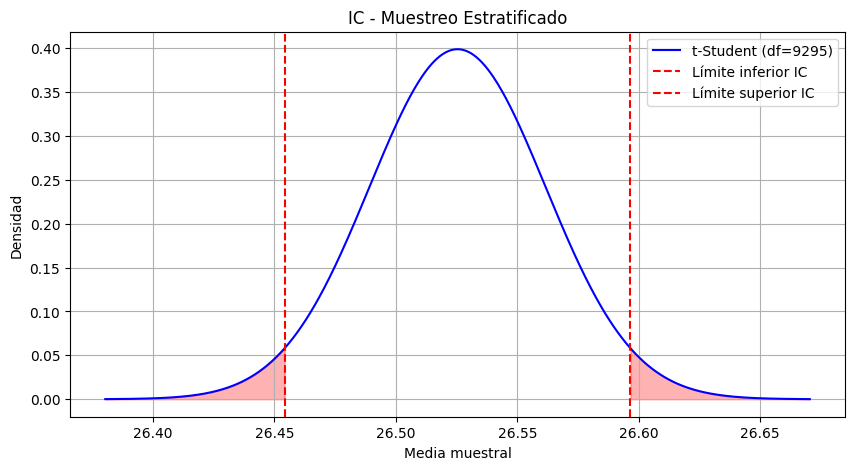

In [24]:
media = df_estratificado['edad_Player'].mean()
std = df_estratificado['edad_Player'].std(ddof=1)
n = len(df_estratificado)

graficar_intervalo_confianza(media, std, n, titulo="IC - Muestreo Estratificado")


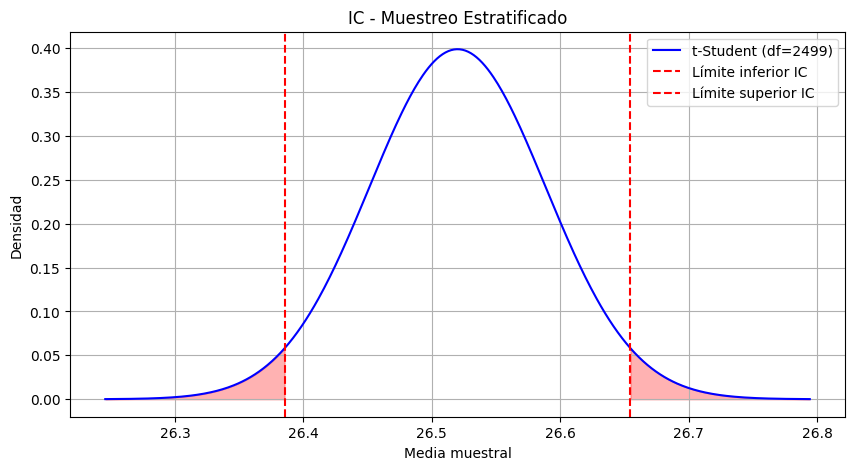

In [25]:
media = df_simple['edad_Player'].mean()
std = df_simple['edad_Player'].std(ddof=1)
n = len(df_simple)

graficar_intervalo_confianza(media, std, n, titulo="IC - Muestreo Estratificado")


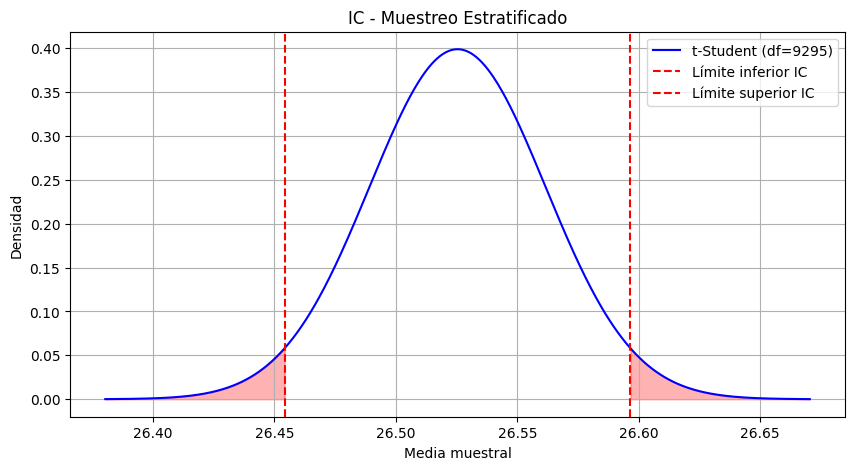

In [26]:
media = df_mundial['edad_Player'].mean()
std = df_mundial['edad_Player'].std(ddof=1)
n = len(df_mundial)

graficar_intervalo_confianza(media, std, n, titulo="IC - Muestreo Estratificado")
